In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import empyrical
%matplotlib inline

In [237]:
DATA_DIR = 'D:/Data/stocks/'
INDEX_FILE = 'D:/Data/index/000906.SH.xlsx'
COMP_FILE = u'D:/Data/index-component/000906.SH.xlsx'

In [238]:
ind_df = pd.read_excel(INDEX_FILE)

In [239]:
comp_df = pd.read_excel(COMP_FILE)

In [240]:
comp_df.head()

,i_weight,sec_name,wind_code
0,0.560,平安银行,000001.SZ
1,1.180,万科A,000002.SZ
2,0.058,深振业A,000006.SZ
3,0.085,神州高铁,000008.SZ
4,0.121,中国宝安,000009.SZ


In [245]:
dic = {}
for code in comp_df['wind_code']:
    fname = '%s/%s.xlsx'%(DATA_DIR, code)
    temp = pd.read_excel(fname)
    dic[code] = temp['mkt_freeshares']
df = pd.DataFrame(dic)

In [246]:
df.tail()

,000001.SZ,000002.SZ,000006.SZ,000008.SZ,000009.SZ,000012.SZ,000021.SZ,000025.SZ,000027.SZ,000028.SZ,...,603799.SH,603806.SH,603816.SH,603858.SH,603866.SH,603868.SH,603877.SH,603883.SH,603888.SH,603993.SH
2018-03-16,8.858368e+10,1.807795e+11,7.036198e+09,1.454940e+10,1.111111e+10,1.165703e+10,6.235556e+09,2.223001e+09,6.290103e+09,7.077083e+09,...,3.423550e+10,2.254511e+09,5.819121e+09,1.699825e+10,2.604987e+09,2.745492e+09,1.642300e+09,5.752347e+09,4.087045e+09,2.114344e+10
2018-03-19,9.002963e+10,1.749622e+11,7.009612e+09,1.419016e+10,1.111111e+10,1.139767e+10,6.249711e+09,2.162570e+09,6.354070e+09,7.284618e+09,...,4.270211e+10,2.205415e+09,5.893074e+09,1.713266e+10,2.643452e+09,2.700148e+09,1.648900e+09,5.838994e+09,4.081751e+09,2.219718e+10
2018-03-20,8.995353e+10,1.736325e+11,6.983027e+09,1.335260e+10,1.125066e+10,1.131121e+10,6.164778e+09,2.185771e+09,6.268781e+09,7.510574e+09,...,4.153303e+10,2.204760e+09,5.895747e+09,1.773260e+10,2.715056e+09,2.574144e+09,1.681350e+09,5.846565e+09,3.921163e+09,2.187648e+10
2018-03-21,9.056235e+10,1.754054e+11,6.920995e+09,1.353609e+10,1.104134e+10,1.123916e+10,6.214322e+09,2.155556e+09,6.258120e+09,7.486014e+09,...,3.996667e+10,2.215889e+09,5.875254e+09,1.738837e+10,2.687243e+09,2.573272e+09,1.653850e+09,5.756553e+09,3.861163e+09,2.114344e+10
2018-03-22,8.873589e+10,1.727461e+11,6.965304e+09,1.349780e+10,1.097157e+10,1.121035e+10,6.299256e+09,2.138829e+09,6.236797e+09,7.319003e+09,...,4.117157e+10,2.156318e+09,5.803974e+09,1.730314e+10,2.644044e+09,2.533596e+09,1.573550e+09,5.797774e+09,3.882340e+09,2.112054e+10


In [247]:
n = 80
mask = df.rank(axis=1, ascending=False)
mask[mask <= n] = 1
mask[mask > n] = 0
cap1 = (mask * df).sum(axis=1)

In [248]:
n = 800
mask = df.rank(axis=1, ascending=False)
mask[mask <= n] = 1
mask[mask > n] = 0
cap2 = (mask * df).sum(axis=1)

In [249]:
ratio = cap1 / cap2

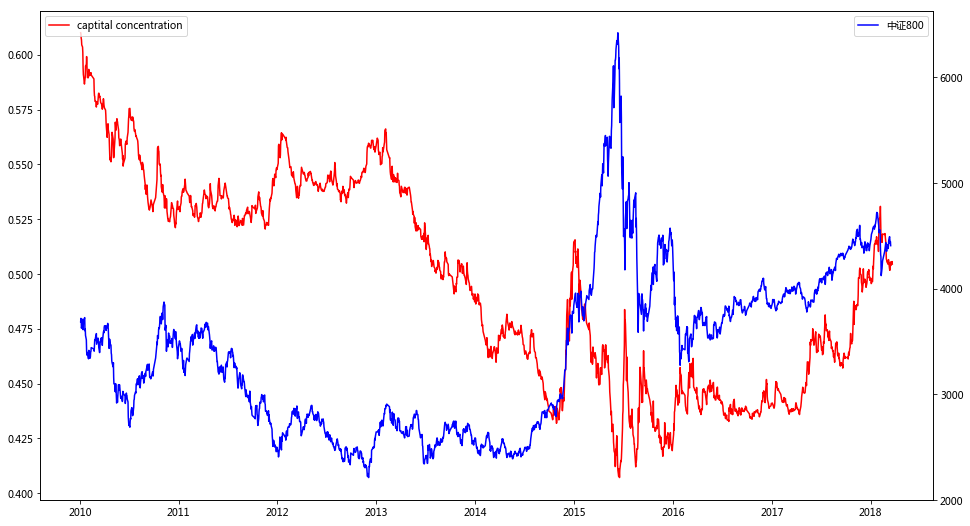

In [250]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(ratio, color='red', label='captital concentration')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(ind_df[ind_df.index >= '2010-01-01']['close'], label=u'中证800', color='blue')
ax2.legend()

In [251]:
print ratio.corr(ind_df['close'])

-0.504524883801


In [252]:
rank_ratio = ratio.rolling(window=972).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])

In [260]:
rank_ratio.tail()

2018-03-16    0.949588
2018-03-19    0.956790
2018-03-20    0.953704
2018-03-21    0.958848
2018-03-22    0.948560
dtype: float64

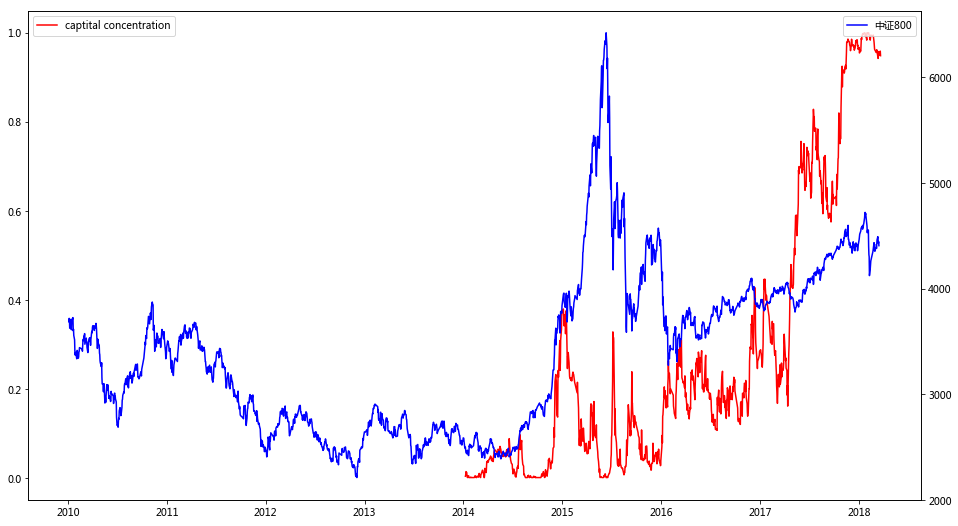

In [253]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(rank_ratio, color='red', label='captital concentration')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(ind_df[ind_df.index >= '2010-01-01']['close'], label=u'中证800', color='blue')
ax2.legend()

In [254]:
k = 0.01
[mm, mx] = rank_ratio.quantile([k, 1-k])

In [255]:
mm_index = rank_ratio[rank_ratio <= mm].index
mx_index = rank_ratio[rank_ratio >= mx].index

In [256]:
mm_index.shape, mx_index.shape

((48L,), (11L,))

In [257]:
k = 20
ret_down = ind_df['close'].pct_change().rolling(k).apply(lambda x: empyrical.max_drawdown(x)).shift(-k)
ret_up = ind_df['close'].pct_change().rolling(k).apply(lambda x: -empyrical.max_drawdown(-x)).shift(-k)

In [258]:
ret_down.resample('M').last().quantile([0.4])

0.4   -0.065814
Name: close, dtype: float64

In [259]:
ret_up.quantile([0.95])

0.95    0.181768
Name: close, dtype: float64

# 验证概率

In [228]:
threshold = 0.1

In [229]:
down_right = ret_down.loc[mm_index].resample('M').last().dropna() < -threshold

In [230]:
up_right = ret_up.loc[mm_index].resample('M').last().dropna() > threshold

In [231]:
(down_right | up_right).sum() * 1.0 / down_right.shape[0]

0.25

In [232]:
down_right = ret_down.loc[mx_index].resample('M').last().dropna() < -threshold

In [233]:
up_right = ret_up.loc[mx_index].resample('M').last().dropna() > threshold

In [234]:
(down_right | up_right).sum() * 1.0 / down_right.shape[0]

1.0

In [235]:
ret_down.loc[mx_index].resample('M').last().dropna()

2018-01-31   -0.12666
Freq: M, Name: close, dtype: float64